In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_cols1 = 30
num_cols2 = 20
num_cols3 = 10

input1 = keras.Input(shape=(num_cols1,), name="Input1")
input2 = keras.Input(shape=(num_cols2,), name="Input2")
input3 = keras.Input(shape=(num_cols3,), name="Input3")

In [ ]:
x1 = layers.Dense(10, name='embedding1')(input1)
x2 = layers.Dense(20, name='embedding2')(input2)
x3 = layers.Dense(5, name='embedding3')(input3)

In [ ]:
x123 = layers.concatenate([x1, x2, x3], name='merging')
y1 = layers.Dense(10, activation='relu', name='FC1')(x123)
y = layers.Dense(1, activation='sigmoid', name='FC2')(y1)
model = keras.Model(inputs=[input1, input2, input3], outputs=y)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input1 (InputLayer)            [(None, 30)]         0           []                               
                                                                                                  
 Input2 (InputLayer)            [(None, 20)]         0           []                               
                                                                                                  
 Input3 (InputLayer)            [(None, 10)]         0           []                               
                                                                                                  
 embedding1 (Dense)             (None, 10)           310         ['Input1[0][0]']                 
                                                                                            

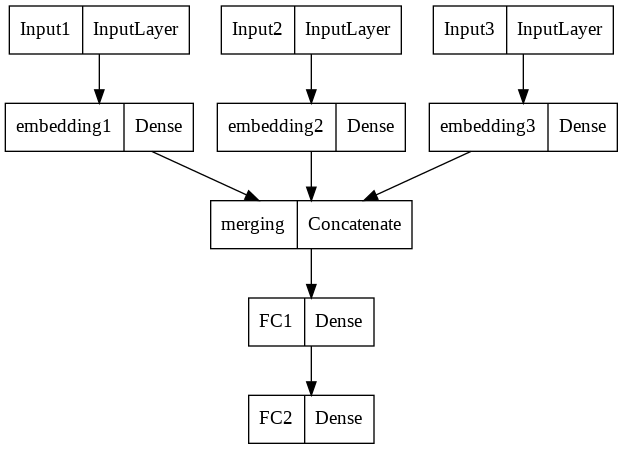

In [ ]:
keras.utils.plot_model(model)

In [ ]:
batch_size = 4
input1_value = tf.random.normal((batch_size, num_cols1))
input2_value = tf.random.normal((batch_size, num_cols2))
input3_value = tf.random.normal((batch_size, num_cols3))

In [ ]:
output = model([input1_value, input2_value, input3_value])
print(output)

tf.Tensor(
[[0.26789957]
 [0.01387283]
 [0.15676361]
 [0.03729185]], shape=(4, 1), dtype=float32)


# Image / Image / Table

In [ ]:
img_shape1 = (28, 28, 1)
num_cols3 = 20
num_cols3 = 10

input1 = keras.Input(shape=img_shape1, name="input1")
input2 = keras.Input(shape=(num_cols2,), name="input2")
input3 = keras.Input(shape=(num_cols3,), name="input3")

In [ ]:
x1 = layers.Conv2D(32, (3, 3), activation='relu')(input1)
x1 = layers.MaxPooling2D(2)(x1)
x1 = layers.Flatten(name='embedding1')(x1)

x2 = layers.Dense(20, name='embedding2')(input2)
x3 = layers.Dense(5, name='embedding3')(input3)

In [ ]:
x123 = layers.concatenate([x1, x2, x3], name='merging')
y1 = layers.Dense(10, activation='relu', name='FC1')(x123)
y = layers.Dense(1, activation='sigmoid', name='FC2')(y1)
model = keras.Model(inputs=[input1, input2, input3], outputs=y)

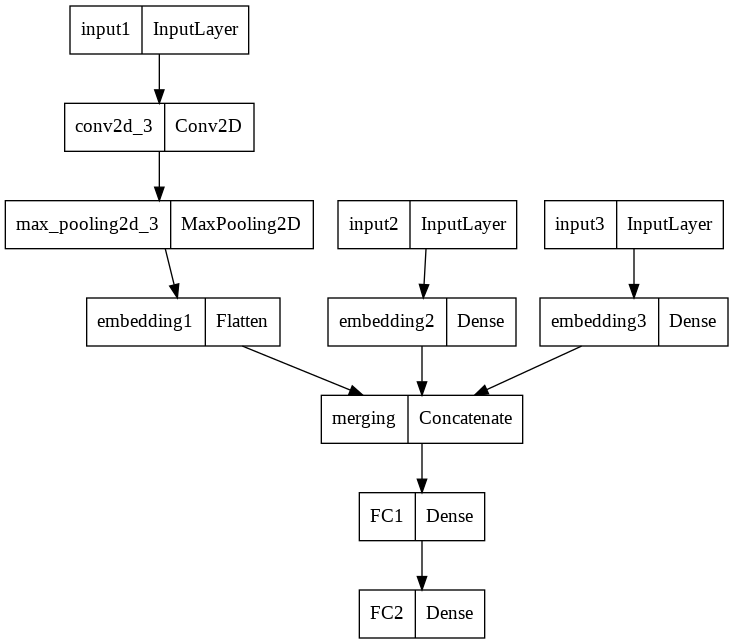

In [ ]:
keras.utils.plot_model(model)

In [ ]:
batch_size = 4
input1_value = tf.random.normal((batch_size, *img_shape1))
input2_value = tf.random.normal((batch_size, num_cols2))
input3_value = tf.random.normal((batch_size, num_cols3))

output = model([input1_value, input2_value, input3_value])
print(output)

tf.Tensor(
[[0.48666993]
 [0.5371525 ]
 [0.5317024 ]
 [0.5305435 ]], shape=(4, 1), dtype=float32)


# Image / Text / Table

In [ ]:
img_shape1 = (28, 28, 1)
text_shape2 = (None,)
num_words = 1000
num_cols3 = 10

input1 = keras.Input(shape=img_shape1, name="input1")
input2 = keras.Input(shape=text_shape2, name="input2")
input3 = keras.Input(shape=(num_cols3,), name="input3")

In [ ]:
x1 = layers.Conv2D(32, (3, 3), activation='relu')(input1)
x1 = layers.MaxPooling2D(2)(x1)
x1 = layers.Flatten(name='embedding1')(x1)

x2 = layers.Embedding(num_words, 64)(input2)
x2 = layers.LSTM(32, name='embedding2')(x2)

x3 = layers.Dense(5, name='embedding3')(input3)

In [ ]:
x123 = layers.concatenate([x1, x2, x3], name='merging')
y1 = layers.Dense(10, activation='relu', name='FC1')(x123)
y = layers.Dense(1, activation='sigmoid', name='FC2')(y1)
model = keras.Model(inputs=[input1, input2, input3], outputs=y)

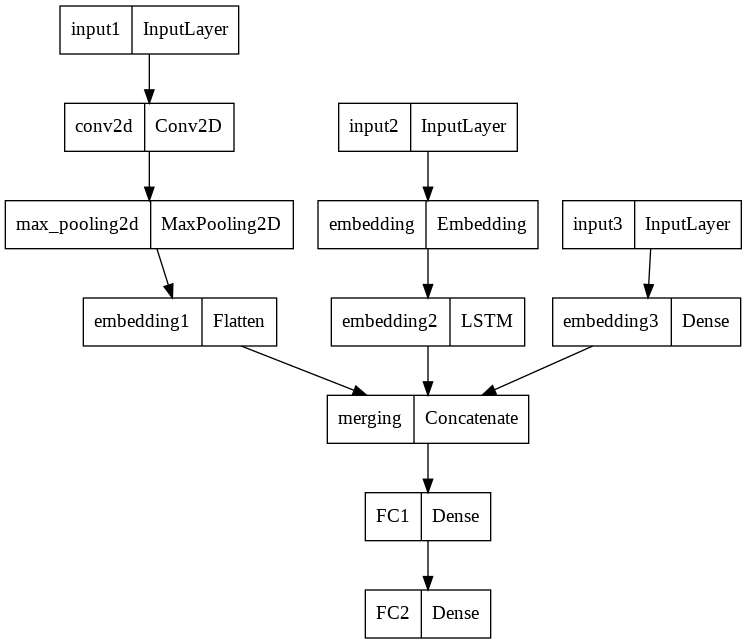

In [ ]:
keras.utils.plot_model(model)

In [ ]:
batch_size = 4
input1_value = tf.random.normal((batch_size, *img_shape1))
input2_value = np.random.randint(num_words, size=(batch_size, 50))
input3_value = tf.random.normal((batch_size, num_cols3))

output = model([input1_value, input2_value, input3_value])
print(output)

tf.Tensor(
[[0.46789673]
 [0.452965  ]
 [0.44578075]
 [0.45835304]], shape=(4, 1), dtype=float32)
